<a href="https://colab.research.google.com/github/Aadi-Vars/ML/blob/main/twitter_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
twitter_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter sentiment /twitter_sentiment_train.csv",encoding="ISO-8859-1")

In [8]:
twitter_df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


0-> negative
1-> positive

In [9]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


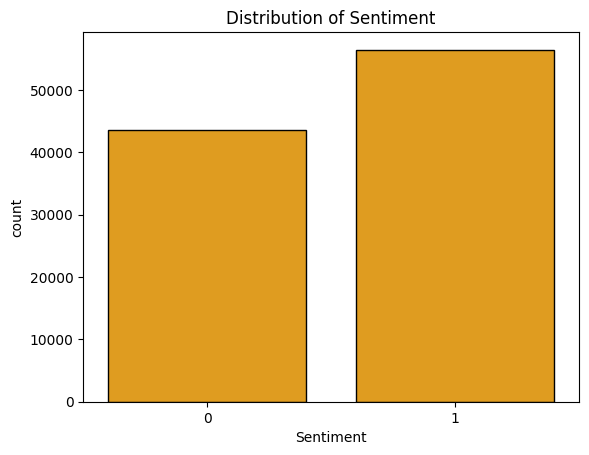

In [10]:
sns.countplot(twitter_df,x="Sentiment",color="orange",edgecolor="black");
plt.title("Distribution of Sentiment");

##Data preprocessing

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:

import nltk
nltk.download("stopwords");
stop_words=stopwords.words("english");

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
#stemming
port_stem=PorterStemmer();

In [14]:
def stemming(content):
    stemmed_content=re.sub('[^A-Za-z]',' ',content);
    stemmed_content=stemmed_content.lower().split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stop_words]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [15]:
twitter_df["sentiment_text"]=twitter_df["SentimentText"].apply(stemming);

In [16]:
twitter_df

,ItemID,Sentiment,SentimentText,sentiment_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,miss new moon trailer
2,3,1,omg its already 7:30 :O,omg alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cri dentist sinc supos...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheat
...,...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...,cupcak seem like repeat problem hope abl find ...
99985,99997,1,@cupcake__ arrrr we both replied to each other...,cupcak arrrr repli differ tweet time see duno ...
99986,99998,0,@CuPcAkE_2120 ya i thought so,cupcak ya thought
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,cupcak dolli ye ye glad fun


In [17]:
input_col="sentiment_text";
target_col="Sentiment";

In [18]:

from sklearn.model_selection import train_test_split
input_train,input_val,target_train,target_val=train_test_split(twitter_df[input_col],twitter_df[target_col],test_size=0.1,random_state=42);

In [19]:
#converting textual data to integer
vectorizer= TfidfVectorizer()
input_train=vectorizer.fit_transform(input_train.values);
input_val=vectorizer.transform(input_val.values);

##Logistic model

In [20]:
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score;
model=LogisticRegression(max_iter=1000);
model.fit(input_train,target_train);

In [21]:
train_prediction=model.predict(input_train)

In [22]:
accuracy_score(target_train, train_prediction)

0.8249027669741082

In [23]:
val_prediction=model.predict(input_val)

In [24]:
accuracy_score(target_val,val_prediction)

0.7562756275627562

In [25]:
def prediction_sentiment(input):
    input=vectorizer.transform([input])
    predic=model.predict(input);
    if predic==0:
        return "Negative"
    else:
        return "Positive"

In [26]:
print(prediction_sentiment(twitter_df.SentimentText[9876]))

Positive


In [27]:
twitter_df.Sentiment[9876]

1

In [28]:
print(prediction_sentiment("Why Instagram does not option to multiple times like a photo??"))

Positive


##Testing over test dataset

In [30]:
test_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter sentiment /twitter_sentiment_test.csv",encoding="ISO-8859-1");

In [31]:
test_df

,ItemID,SentimentText
0,1,is so sad for my APL frie...
1,2,I missed the New Moon trail...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...
...,...,...
299984,299996,"@martine2323 'Morning, Petal - work brought me..."
299985,299997,"@martinetrene Hello,little bird! i finally st..."
299986,299998,@MartinezMayra I got u at work when I go buy o...
299987,299999,@martinfaux He certainly gives good interview


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299989 entries, 0 to 299988
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ItemID         299989 non-null  int64 
 1   SentimentText  299989 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [34]:
#Data processing
inputs=vectorizer.transform(test_df.SentimentText)
print(inputs)

  (0, 69573)	0.4878624377209893
  (0, 67083)	0.251723812893356
  (0, 59568)	0.5511889726999234
  (0, 46953)	0.26235630298991475
  (0, 12557)	0.570951180521445
  (1, 73801)	0.48580475137783
  (1, 72570)	0.6845649969223445
  (1, 60236)	0.29392754802729737
  (1, 58940)	0.45713357461260273
  (2, 61627)	1.0
  (3, 69785)	0.22580503633410645
  (3, 64764)	0.19660400421081492
  (3, 61674)	0.35071899348730695
  (3, 61628)	0.3804800380073781
  (3, 53418)	0.3673105660112346
  (3, 51323)	0.2978161076717896
  (3, 48876)	0.2740386576631624
  (3, 47713)	0.12215123131671482
  (3, 42523)	0.2914577886961915
  (3, 41039)	0.3150361604126194
  (3, 15569)	0.3804800380073781
  (4, 72867)	0.26500099159549595
  (4, 61674)	0.6497817612655729
  (4, 58092)	0.5162390368198126
  (4, 22027)	0.4909739239953242
  :	:
  (299985, 22989)	0.17841471386931695
  (299985, 13197)	0.22001395812803823
  (299985, 8579)	0.10066621707074458
  (299985, 918)	0.24224931168751415
  (299986, 77663)	0.19056671658253516
  (299986, 77013)	

In [35]:
prediction_test=model.predict(inputs)

In [36]:
final_df=pd.DataFrame({
"ItemID":test_df.ItemID,
"Sentiment": prediction_test});
final_df

,ItemID,Sentiment
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
299984,299996,1
299985,299997,1
299986,299998,0
299987,299999,1


In [37]:
final_df.to_csv("final.csv", encoding="ISO-8859-1",index=None)